In [76]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

df = load_data.load_county_level()
outcome_cases = load_data.outcome_cases
outcome_deaths = load_data.outcome_deaths
important_vars = load_data.important_keys(df)
print(df.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading county level data...


/accounts/projects/vision/chandan/covid-19-geographic-risk-prediction/functions/merge_data.py:40: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



ks Index(['countyFIPS', 'Respiratory Mortality'], dtype='object')
Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       'Respiratory Mortality', 'dem_to_rep_ratio', '#Hospitals', '#ICU_beds',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'FracMale2017', '#FTEHospitalTotal2017', 'mortality2015-17Estimated'],
      dtype='object', length=7306)


## how many deaths/cases are there

In [77]:
df[[outcome_deaths, outcome_cases, 'StateName', 'CountyName', ]].head(10)

,#Deaths_3/23/2020,#Cases_3/23/2020,StateName,CountyName
1831,125.0,12305.0,New York,New York
2941,87.0,1170.0,Washington,King
1121,20.0,567.0,Louisiana,Orleans
202,13.0,321.0,California,Santa Clara
2955,11.0,519.0,Washington,Snohomish
1748,9.0,609.0,New Jersey,Bergen
583,9.0,922.0,Illinois,Cook
1285,8.0,638.0,Michigan,Wayne
178,7.0,536.0,California,Los Angeles
407,6.0,69.0,Georgia,Dougherty


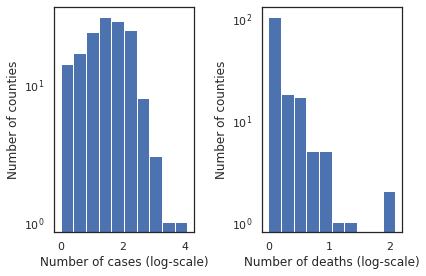

In [78]:
d = df[df[outcome_deaths] > 0]
R, C = 1, 2
plt.subplot(R, C, 1)
plt.hist(np.log10(d[outcome_cases]))
plt.xlabel('Number of cases (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')

plt.subplot(R, C, 2)
plt.hist(np.log10(d[outcome_deaths]))
plt.xlabel('Number of deaths (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')
plt.tight_layout()
plt.show()

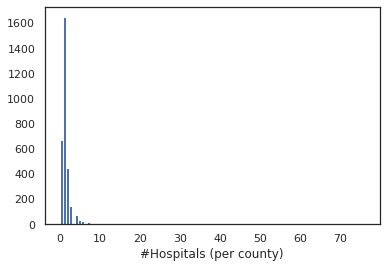

In [79]:
plt.hist(df['#Hospitals'], bins=100)
plt.xlabel('#Hospitals (per county)')
plt.show()

# correlations

In [ ]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[[k for k in important_vars if not 'PopMale' in k and not 'PopFmle' in k and not 'MortalityAge' in k and not 'PopTotal' in k] + 
        [outcome_cases, outcome_deaths]]

# Compute the correlation matrix
corrs = d.corr(method='spearman')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(8, 8), dpi=300)
sns.heatmap(corrs, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.clustermap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('results/correlations_heatmap.png')
plt.show()

In [ ]:
keys = np.array(corrs.index)
k = np.where(keys == outcome_deaths)[0][0]
corrs_row = corrs.iloc[k]
args = np.argsort(corrs_row)
plt.figure(dpi=300, figsize=(6, 5))
plt.barh(keys[args][:-1], corrs_row[args][:-1]) # 1 to drop outcome itself
plt.xlabel('Correlation (spearman) with # deaths')
plt.tight_layout()
plt.savefig('results/correlations.png')
plt.show()

# interactive plots

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute=outcome_cases,
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    
    output_file(f"results/{state}.html", mode='inline')
    show(p)
    save(p)

In [ ]:
sorted(list([k for k in df.keys() if '' in k.lower()]))

## plot political leaning

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute='dem_to_rep_ratio',
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    show(p)